# Groupby & Boxplot

1. [Quick recap](#section1)
2. [titanic_df questions](#section2)
3. [Survey_df](#section3)
4. [Pivot table](#section4)
5. [`dateTime` practice](#section5)
6. [Boxplot: Definition and motivation](#section6)
7. [Working with Boxplot](#section7)

#  <b id="Top"> </b>  

<a id='section1'></a>
### Quick recap

---

>
>* `groupby()` - group according to the columns specified
>
>* `reset_index()`  adds a numerical index
>
>* `pd.to_datetime(df['date'])` - changes the attribute type to datetime
>
>* `pd.DatetimeIndex(df['date']).month` - extracts the month from the datatime attribute
>
>* `apply` - applies a function on each row (axis =0) in the dataframe. Change to (axis = 1) to apply the function on each column [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply)
>
>* `lambda` - small anonymous function
>
>* `agg` - apply multiple functions at once, one for each specified column [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
>
>* `unstack` - unstack the inner-most index onto a column
>
>* `droplevel(0, axis = 1)` - drops the highest (first) level in the column index of a multi-index dataframe
>
>* `transpose` - switch between columns and rows
---

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/Razelbaz1/exercises-package/master/data/titanic.csv'
titanic_df = pd.read_csv(url,encoding='latin1')

In [3]:
titanic_df

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
...,...,...,...,...,...,...,...,...,...,...,...
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female


<a id='section2'></a>
#### 1. How many passengers were in each class ?

#### 2. Suggest a solution for the code you wrote to additionally classify by gender.

#### 3. Suggest a solution for how many survived by class and gender.

#### 4. Suggest a solution for how many total and average survivors by class

#### Can we convert continuous or interval ratio types of data into a categorical variable ?
#### Think about a way to group by `age`


##### Hint: look for `pd.cut` via internet

In [4]:
titanic_df['age_bins'] = pd.cut(titanic_df['age'], bins = 3, labels = ('young', 'middle_age', 'old' )) # bins also accept intervals such as bins=range(0, 100, 10)
titanic_df

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,age_bins
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,middle_age
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,young
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,middle_age
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,middle_age
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,young
...,...,...,...,...,...,...,...,...,...,...,...,...
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male,NaN
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male,NaN
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male,NaN
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female,NaN


In [5]:
titanic_df.groupby(['age_bins'])['survived'].sum()

age_bins
young         104
middle_age    130
old            47
Name: survived, dtype: int64

###  Did you know ?

#### You can display a graph as a result of grouping directly.

#### Read more online about `plot()`

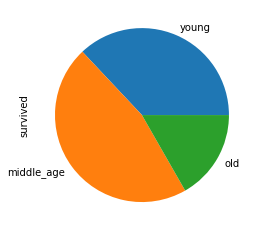

In [6]:
titanic_df.groupby(['age_bins'])['survived'].sum().plot(kind = 'pie');

##### Have we classified the ages correctly?
##### Suggest a way to check this.

In [7]:
age_group_stats = titanic_df.groupby('age_bins')['age'].describe()
age_group_stats

,count,mean,std,min,25%,50%,75%,max
age_bins,,,,,,,,
young,209.0,15.946969,6.836041,0.1667,13.0,18.0,21.0,23.0
middle_age,325.0,33.596923,6.797829,24.0000,28.0,32.0,39.0,47.0
old,99.0,55.494949,6.255404,48.0000,50.0,54.0,60.0,71.0


##### According to this test we can say yes.

#### Bonus question: Is the following line of code necessary to write before?

In [8]:
titanic_df.dropna(subset=['age'], inplace = True)

### [▲](#Top)

---
<a id='section3'></a>
## More practice : Survey_df

https://insights.stackoverflow.com/survey

In [9]:
df = pd.read_csv('survey_results_public.csv', index_col='ResponseId')
schema_df = pd.read_csv('survey_results_schema.csv', index_col='qid')

In [10]:
df.shape

(89184, 83)

#### A useful tip for working with a large database `pd.set_option('key', 'value')`

Allows you to set various options to control the behavior and display of pandas objects, such as DataFrames or Series.
It's useful for customizing the way pandas handles data, and it can be especially helpful when working with large datasets or when you want to change the default behavior of pandas for specific tasks.

In [11]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [12]:
df.head()

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,For

basic aggregation - combining multiple pieces of data into a single result.
for example:
mean
median
mode

#### 5. What is a typical salary for developers who answered this survey ?
look for 'ConvertedCompYearly' column

What will happen if we run the following code?

In [13]:
#df.median()

#### 6. Take a overview of some different stats

In [14]:
df.describe()

,CompTotal,WorkExp,ConvertedCompYearly
count,4.822500e+04,43579.000000,4.801900e+04
mean,1.036807e+42,11.405126,1.031101e+05
std,2.276847e+44,9.051989,6.814188e+05
min,0.000000e+00,0.000000,1.000000e+00
25%,6.300000e+04,5.000000,4.390700e+04
50%,1.150000e+05,9.000000,7.496300e+04
75%,2.300000e+05,16.000000,1.216410e+05
max,5.000000e+46,50.000000,7.435143e+07


##### Look at the average salary among developers; `(ConvertedCompYearly)`, can we conclude from this that it is indeed the average for this profession?

---
#### In one of the survey questions, people were asked if they have a user account on the website;
#### suggest a way to count how many people responded for each of the options provided in the survey.
#### The column the question refers to is called 'SOAccount'

In [15]:
df['SOAccount'] # the desired column

ResponseId
1        NaN
2        Yes
3        Yes
4        Yes
5         No
        ... 
89180    Yes
89181    Yes
89182    NaN
89183     No
89184    Yes
Name: SOAccount, Length: 89184, dtype: object

In [16]:
df['SOAccount'].value_counts()

Yes                        66282
No                         14618
Not sure/can't remember     6952
Name: SOAccount, dtype: int64

###  A question to refresh the memory, 
#### in the database `schema_df` we can use it to retrieve the complete questions asked by the people who filled out the survey.
#### Display the question asked by the name 'SOAccount'

---
#### Display the value counts for each country 

In [17]:
df['Country'].value_counts()

United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
                                                        ...  
Saint Kitts and Nevis                                       1
Marshall Islands                                            1
Samoa                                                       1
Central African Republic                                    1
San Marino                                                  1
Name: Country, Length: 185, dtype: int64

In [18]:
df['Country'].value_counts(normalize=True)

United States of America                                0.211963
Germany                                                 0.083298
India                                                   0.063940
United Kingdom of Great Britain and Northern Ireland    0.063110
Canada                                                  0.039865
                                                          ...   
Saint Kitts and Nevis                                   0.000011
Marshall Islands                                        0.000011
Samoa                                                   0.000011
Central African Republic                                0.000011
San Marino                                              0.000011
Name: Country, Length: 185, dtype: float64

#### 7. Group the data by `country` and display only the 'United States of America' by using the function `.groupby()`

#### 8. Show the median annual salary by Germany

## <b id="section_2">Let's now try to answer a question, and by reading the  </b> <b style='color:#F05454'>error  </b> <b>we get we'll try to find the solution.</b> 

#### 9. How many people knew Python from 'United States of America' ?
##### Suggest solving this by using the groupby() function and not using it.

## 1.

## 2.

In [19]:
df.groupby(['Country'])['LanguageHaveWorkedWith'].str.contains('Python').sum()

AttributeError: 'SeriesGroupBy' object has no attribute 'str'

---
#### 10. Does seeing these numbers by itself can help us understand of the percentage of people in each country who knew Python ? 
#### Suggest a way to solve it.

In [20]:
country_respondents = df['Country'].value_counts()
country_respondents

United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
                                                        ...  
Saint Kitts and Nevis                                       1
Marshall Islands                                            1
Samoa                                                       1
Central African Republic                                    1
San Marino                                                  1
Name: Country, Length: 185, dtype: int64

---

#### 11. Show median and average together for the annual salary by Germany

### [▲](#Top)
---
# Pivot table :
<a id='section4'></a>

#### Pivot tables are especially useful when dealing with large and complex datasets.

A pivot table is a data summarization tool used in spreadsheet software and data analysis tools, like Excel or Pandas in Python.
It allows you to transform and aggregate data from a given dataset into a structured table format, making it easier to analyze and visualize information.

> <ins>**Rows and Columns:**</ins> In a pivot table, you select one or more columns to serve as the "rows" and one or more columns to serve as the "columns." The data in these selected columns will be used to categorize and structure the pivot table.

> <ins>**Values:**</ins> You can specify a numeric column whose values you want to aggregate or summarize. These values can be aggregated using various functions such as sum, average, count, etc.

> <ins>**Aggregation:**</ins> Pivot tables perform aggregation operations on the values within each cell of the table. Common aggregation functions include sum, average, count, minimum, maximum, and more. You can choose the aggregation function that best suits your analysis.

> <ins>**Filters:**</ins> Pivot tables often allow you to apply filters to restrict which data is included in the table. These filters can be based on the values in one or more columns.

> <ins>**Row Totals and Column Totals:**</ins> Pivot tables typically include row totals and column totals, which display the aggregated values for each row and column.

> <ins>**Grand Total:**</ins> A grand total is the sum of all values in the pivot table. It represents the overall summary of the data

In [21]:
# Create a DataFrame
data = {'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
        'Value': [10, 15, 20, 25, 30, 35]}
df = pd.DataFrame(data)

# Create a pivot table
pivot_table = df.pivot_table(values='Value', index='Category', aggfunc='sum')

print(df)

  Category  Value
0        A     10
1        B     15
2        A     20
3        B     25
4        A     30
5        B     35


In [22]:
print(pivot_table)

          Value
Category       
A            60
B            75


## <ins>**Filters:**</ins>
Filters allow you to subset the data included in the pivot table based on specific criteria.


In [23]:
# Create a DataFrame

data = {
    'Product': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics', 'Clothing'],
    'Region': ['North', 'South', 'North', 'South', 'North', 'South'],
    'Sales': [100, 150, 200, 250, 300, 350],
    'Date': ['2023-01-01', '2023-01-01', '2023-02-01', '2023-02-01', '2023-03-01', '2023-03-01']
}

df = pd.DataFrame(data)
df

,Product,Category,Region,Sales,Date
0,A,Electronics,North,100,2023-01-01
1,B,Clothing,South,150,2023-01-01
2,A,Electronics,North,200,2023-02-01
3,B,Clothing,South,250,2023-02-01
4,A,Electronics,North,300,2023-03-01
5,B,Clothing,South,350,2023-03-01


In [24]:
# Create a pivot table with 'Category' as rows, 'Region' as columns, and sum of 'Sales' as values
pivot_table = df.pivot_table(values='Sales', index='Category', columns='Region', aggfunc='sum')

# Apply a filter to only include rows where 'Category' is 'Electronics'
filtered_pivot = pivot_table[pivot_table.index == 'Electronics']
print(pivot_table)
print()
print(filtered_pivot)


Region       North  South
Category                 
Clothing       NaN  750.0
Electronics  600.0    NaN

Region       North  South
Category                 
Electronics  600.0    NaN


## <ins>**Row Totals and Column Totals:**</ins>

In [25]:
# Create a pivot table with 'Category' as rows, 'Region' as columns, and sum of 'Sales' as values
pivot_table = df.pivot_table(values='Sales', index='Category', columns='Region', aggfunc='sum')

# Add row totals and column totals
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table.loc['Total'] = pivot_table.sum()

print(pivot_table)


Region       North  South   Total
Category                         
Clothing       NaN  750.0   750.0
Electronics  600.0    NaN   600.0
Total        600.0  750.0  1350.0


In this example, we calculate row totals by adding a 'Total' row at the end, and column totals by adding a 'Total' column at the end of the pivot table.

## <ins>**Grand Total:**</ins>

The grand total represents the sum of all values in the pivot table, providing an overall summary.

In [26]:
# Create a pivot table with 'Category' as rows, 'Region' as columns, and sum of 'Sales' as values
pivot_table = df.pivot_table(values='Sales', index=['Category'], columns='Region', aggfunc='sum')

# Calculate the grand total
grand_total = pivot_table.values.sum()

print("Grand Total:", grand_total)

Grand Total: nan


In this example, we calculate the grand total by summing all the values in the pivot table, providing the total sales across all categories and regions.

#### But note that we received NaN, `Grand Total` is sensitive to missing values! They must be dealt with first or just use `row totals and column totals`.

## Exercise

In [27]:
data = {
    'Month': ['Jan', 'Feb', 'Jan', 'Feb', 'Jan', 'Feb'],
    'Product': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Sales': [1000, 1200, 800, 900, 1500, 1600]
}

df = pd.DataFrame(data)
df

,Month,Product,Sales
0,Jan,A,1000
1,Feb,A,1200
2,Jan,B,800
3,Feb,B,900
4,Jan,C,1500
5,Feb,C,1600


#### 12. What were the sales for Product A in February?

#### 13. Can you find the total sales for each month and the overall total sales across all products?

### Interactive Pivot Table Using PivotTableJS in Jupyter Notebook

In [21]:
#!pip install pivottablejs
from pivottablejs import pivot_ui

In [22]:
pivot_ui(df,outfile_path='pivottablejs.html')
#HTML('pivottablejs.html')

##### Pivot tables are a powerful tool for data analysis and reporting, allowing you to quickly gain insights into your data by summarizing and aggregating information in a structured format.

### [▲](#Top)
---

<a id='section5'></a>
## self `dateTime` practice

#### Read data about Covid cases in Italy on start stage of pandemic using pandas

In [28]:
url = 'https://raw.githubusercontent.com/Razelbaz1/exercises-package/master/data/datasets_italy-covid-daywise.csv'
covid_df = pd.read_csv(url)
covid_df.tail()

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


#### We will focus on date column

In [29]:
covid_df["date"]

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

#### note that date type is object. let's convert it to pandas datetime
#### for pandas datetime reference and examples: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
#### video tutorial: https://www.youtube.com/watch?v=UFuo7EHI8zc

In [30]:
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

#### now we can extract the year,month,day and weekday properties (and much more )

In [31]:
cuvidDateTimeObj = pd.DatetimeIndex(covid_df.date)
covid_df['year'] = cuvidDateTimeObj.year
covid_df['month'] = cuvidDateTimeObj.month
covid_df['day'] = cuvidDateTimeObj.day
covid_df['weekday'] = cuvidDateTimeObj.weekday
covid_df


,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


#### By using datetime we can present rows of specific dates, for example only August:

In [32]:
covid_df_august = covid_df[covid_df.month == 8]
covid_df_august.tail()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
240,2020-08-27,1366.0,13.0,57640.0,2020,8,27,3
241,2020-08-28,1409.0,5.0,65135.0,2020,8,28,4
242,2020-08-29,1460.0,9.0,64294.0,2020,8,29,5
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0


In [33]:
# print todays date in pandas:
# import pandas as pd
from datetime import date # get python datetime
print(date.today())

2023-09-11


In [34]:
# self learning:.
# 1. calculate total deaths in May at the above 'italy-covid-daywise.csv' url
# 2. python pandas datetime excercises (with solutions):
# https://www.w3resource.com/python-exercises/pandas/datetime/index.php

# Read tirgul 5 on SeaBorn (not matplotlib)

In [35]:











# solution 1
import pandas as pd
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/italy-covid-daywise.csv'
covid_df = pd.read_csv(url)
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
totalDeathsInMay = covid_df[covid_df.month == 5]['new_deaths'].sum()
print('total deaths in May: ',totalDeathsInMay)

total deaths in May:  5658.0


### [▲](#Top)
---

<a id='section6'></a>
# Boxplot

Check the [matplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) for even more styling options

<a id='section1'></a>

<div class="image-container">
  <img src= "https://github.com/Razelbaz1/exercises-package/blob/master/pics/boxplot.png?raw=true"
    alt="Centered Image" width="800" height="200" /> </div>


In [36]:
import seaborn as sns  # for creating the graphs
import matplotlib.pyplot as plt  #for reshaping graph size
import numpy as np
import random

## Motivation

In [37]:
# Creating a first DataFrame with the relative distribution of scores in the center and an average of 75
np.random.seed(0)
num_students = 80
grades = np.random.randint(60, 90, num_students)  # grade range 60-89
student_ids = range(1, num_students + 1)
names = ['Student ' + str(i) for i in range(1, num_students + 1)]
df1 = pd.DataFrame({'ID': student_ids, 'Name': names, 'Grade': grades})

# Creating a second DataFrame with the distribution of scores at the edges and an average of 75
np.random.seed(1)
grades_low = np.random.randint(40, 60, num_students // 2)  # grade range  40-59
grades_high = np.random.randint(90, 100, num_students // 2)  # grade range  90-99
grades = np.concatenate((grades_low, grades_high))
random.shuffle(grades)  # shuffle grades
df2 = pd.DataFrame({'ID': student_ids, 'Name': names, 'Grade': grades})

print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)


DataFrame 1:
    ID        Name  Grade
0    1   Student 1     72
1    2   Student 2     75
2    3   Student 3     81
3    4   Student 4     60
4    5   Student 5     63
5    6   Student 6     87
6    7   Student 7     63
7    8   Student 8     67
8    9   Student 9     69
9   10  Student 10     79
10  11  Student 11     81
11  12  Student 12     78
12  13  Student 13     64
13  14  Student 14     83
14  15  Student 15     66
15  16  Student 16     84
16  17  Student 17     84
17  18  Student 18     72
18  19  Student 19     86
19  20  Student 20     61
20  21  Student 21     66
21  22  Student 22     67
22  23  Student 23     83
23  24  Student 24     74
24  25  Student 25     84
25  26  Student 26     77
26  27  Student 27     65
27  28  Student 28     85
28  29  Student 29     73
29  30  Student 30     68
30  31  Student 31     69
31  32  Student 32     80
32  33  Student 33     79
33  34  Student 34     76
34  35  Student 35     79
35  36  Student 36     65
36  37  Student 37     75

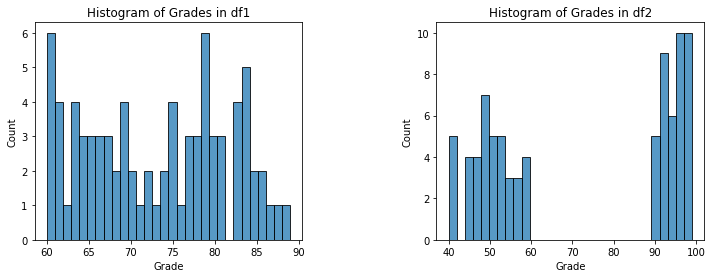

In [38]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

# Create histograms for the 'Grade' column in df1 and df2 with titles
sns.histplot(data = df1, x = 'Grade', ax = ax[0], bins=30)
ax[0].set_title('Histogram of Grades in df1')

sns.histplot(data = df2, x = 'Grade', ax = ax[1], bins=30)
ax[1].set_title('Histogram of Grades in df2')

plt.show()

#### Let's look at the statistics for each table, but we'll want to look at the data so that it's convenient for us to look at both at the same time - we'll add them together.

In [39]:
# Change column name from 'Grade' in-`df1` to 'grade_df1'
df1.rename(columns={'Grade': 'grade_df1'}, inplace=True)

# Change column name from 'Grade' in-`df2` to 'grade_df2'
df2.rename(columns={'Grade': 'grade_df2'}, inplace=True)

In [40]:

# merge the data frames 
merged_df = pd.concat([df1, df2], ignore_index=True)

# print merge df 
print(merged_df)


     ID        Name  grade_df1  grade_df2
0     1   Student 1       72.0        NaN
1     2   Student 2       75.0        NaN
2     3   Student 3       81.0        NaN
3     4   Student 4       60.0        NaN
4     5   Student 5       63.0        NaN
..   ..         ...        ...        ...
155  76  Student 76        NaN       97.0
156  77  Student 77        NaN       53.0
157  78  Student 78        NaN       41.0
158  79  Student 79        NaN       40.0
159  80  Student 80        NaN       98.0

[160 rows x 4 columns]


In [41]:
merged_df.describe()

,ID,grade_df1,grade_df2
count,160.00000,80.00000,80.000000
mean,40.50000,73.10000,72.462500
std,23.16471,8.67938,23.235146
min,1.00000,60.00000,40.000000
25%,20.75000,65.00000,49.750000
50%,40.50000,74.00000,74.500000
75%,60.25000,80.00000,95.250000
max,80.00000,89.00000,99.000000


In [42]:
#df1.describe()

In [43]:
#df2.describe()

In [44]:
import pandas as pd

# list of grades
grades_to_calculate = [i  for i in range(60,90)]

# new data frame for calculation
results_df = pd.DataFrame({'Grade': grades_to_calculate})

# 
results_df['Frequency'] = [len(df1[df1['grade_df1'] == grade]) for grade in grades_to_calculate]
results_df['Relative Frequency'] = results_df['Frequency'] / len(df1)
results_df['Cumulative Relative Frequency'] = results_df['Relative Frequency'].cumsum()

# final result

In [45]:
import pandas as pd

# list of grades
grades_to_calculate = [i for i in range(60, 90)]

# new data frame for calculation
results_df = pd.DataFrame({'Grade': grades_to_calculate})

results_df['Frequency'] = [len(df1[df1['grade_df1'] == grade]) for grade in grades_to_calculate]
results_df['Relative Frequency'] = results_df['Frequency'] / len(df1)
results_df['Cumulative Relative Frequency'] = results_df['Relative Frequency'].cumsum()

# Define a function to highlight specific rows
def highlight_specific_rows(s, rows_to_highlight):
    # Create a boolean mask for rows to highlight
    mask = s.index.isin(rows_to_highlight)
    # Create a DataFrame of styles
    styles = pd.DataFrame('', index=s.index, columns=s.columns)
    # Set the background color for the specified rows
    styles.loc[mask, :] = 'background-color: yellow'
    return styles

# Rows to highlight (in this case, rows 5 and 20)
rows_to_highlight = [5, 20]

# Apply the styling to the DataFrame
styled_results_df = results_df.style.apply(highlight_specific_rows, rows_to_highlight=rows_to_highlight, axis=None)

# Display the styled DataFrame
styled_results_df


,Grade,Frequency,Relative Frequency,Cumulative Relative Frequency
0,60,6,0.075000,0.075000
1,61,4,0.050000,0.125000
2,62,1,0.012500,0.137500
3,63,4,0.050000,0.187500
4,64,3,0.037500,0.225000
5,65,3,0.037500,0.262500
6,66,3,0.037500,0.300000
7,67,3,0.037500,0.337500
8,68,2,0.025000,0.362500
9,69,4,0.050000,0.412500


---

### Bonus: manual boxplot construction and definition

In [46]:
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [47]:
blue, orange, green, red = sns.color_palette()[:4]

In [48]:
pts = [1, 1.5, (7/3), 3, 3.75, 4.25, 5, 19/3, 8, 12]

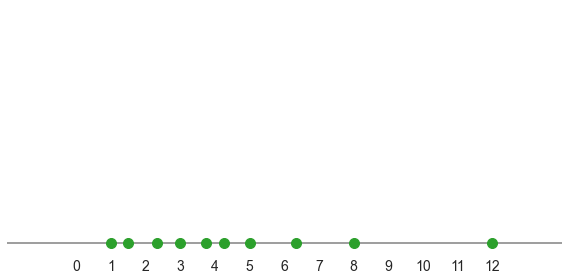

In [49]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

In [50]:
pd.Series(pts).describe()

count    10.000000
mean      4.716667
std       3.341010
min       1.000000
25%       2.500000
50%       4.000000
75%       6.000000
max      12.000000
dtype: float64

#### Draw the median

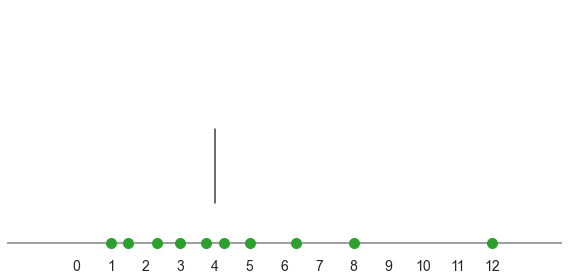

In [51]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')  #median at 4
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

#### Draw the 25th percentile

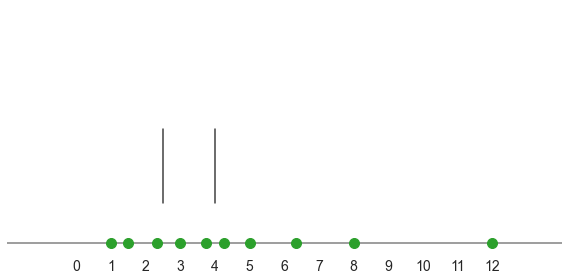

In [52]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E') 
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E') #25th percentile
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

#### Draw the 25th percentile on the other side that now represent the 75th percentile

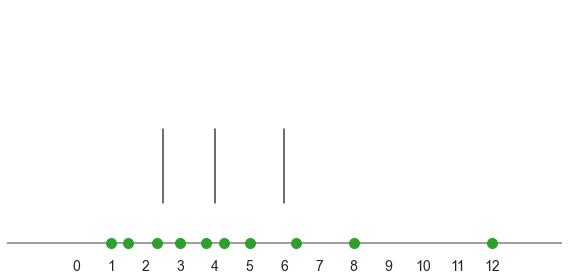

In [53]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')  
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')  
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')   #75th percentile
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

#### Connect the lines and paint

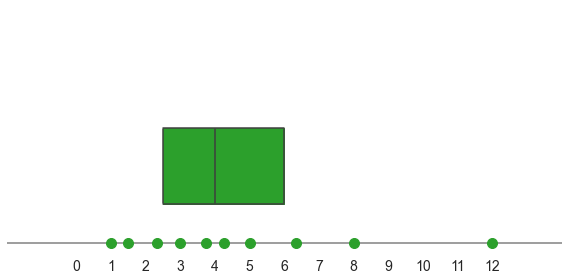

In [54]:
xvals=np.linspace(2.5, 6, 100)

plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')  #connect box
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')  #connect box
plt.gca().fill_between(xvals, 0.092, 0.268, color=green)  #add color
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

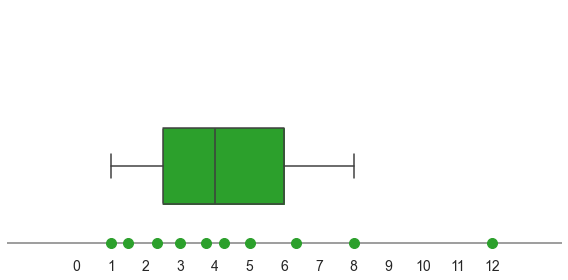

In [55]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.18, xmin=(3/16), xmax=(4.5/16), color='#3E3E3E')
plt.axvline(1, ymin=0.3, ymax=0.4, color='#3E3E3E')
plt.axhline(0.18, xmin=(8/16), xmax=(10/16), color='#3E3E3E') #add upper whisker
plt.axvline(8, ymin=0.3, ymax=0.4, color='#3E3E3E')           #add upper whisker
plt.gca().fill_between(xvals, 0.092, 0.268, color=green)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

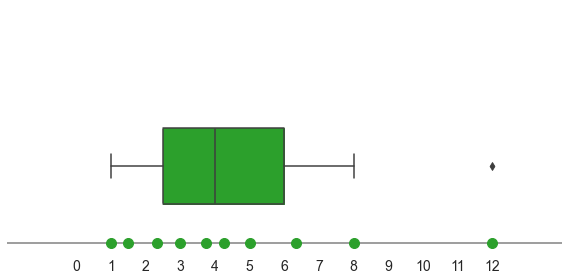

In [56]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.18, xmin=(3/16), xmax=(4.5/16), color='#3E3E3E')
plt.axvline(1, ymin=0.3, ymax=0.4, color='#3E3E3E')
plt.axhline(0.18, xmin=(8/16), xmax=(10/16), color='#3E3E3E')
plt.axvline(8, ymin=0.3, ymax=0.4, color='#3E3E3E')
plt.scatter(12, 0.18, marker="d", s=30, color='#3E3E3E')  #add flier
plt.gca().fill_between(xvals, 0.092, 0.268, color=green)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

C:\Users\razel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


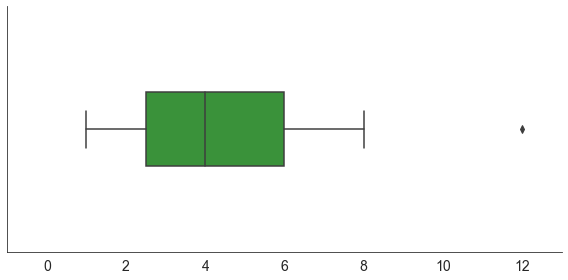

In [57]:
#check manual against seaborn plot

plt.figure(figsize=(8,4))
sns.boxplot(pts, color=green, width=0.3)
sns.despine()
plt.xlim(-1, 13)
plt.tight_layout();

In [58]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### [▲](#Top)
---


<a id='section7'></a>
## Working with Boxplot

In [59]:
sns.set_style('whitegrid')

In [60]:
cars = sns.load_dataset('mpg').dropna()

cars.shape

(392, 9)

In [61]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Filter down to only cars with even number of cylinders

In [62]:
cars = cars[cars.cylinders.isin([4,6,8])]

C:\Users\razel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


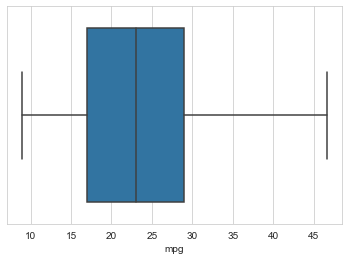

In [63]:
sns.boxplot(cars.mpg);

In [64]:
cars.mpg.describe()

count    385.000000
mean      23.445455
std        7.836911
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

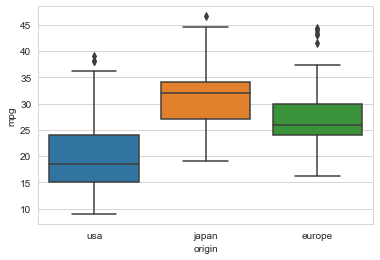

In [65]:
sns.boxplot(x=cars.origin, y=cars.mpg);

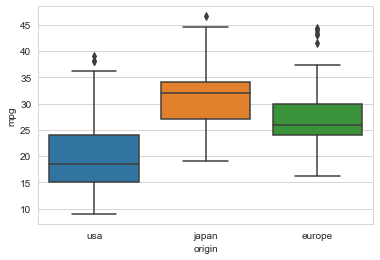

In [66]:
sns.boxplot(x='origin', y='mpg', data=cars);

### Hue

#### By Cylinders

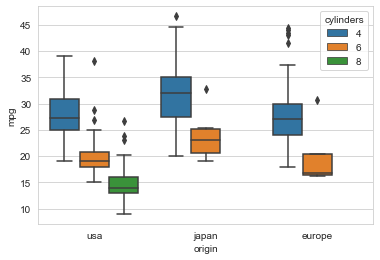

In [67]:
sns.boxplot(x='origin', y='mpg', hue='cylinders', data=cars);

#### By Model Year

In [68]:
cars.model_year.describe()

count    385.000000
mean      75.961039
std        3.692058
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64

In [69]:
cars['newer_model'] = cars.model_year > 76

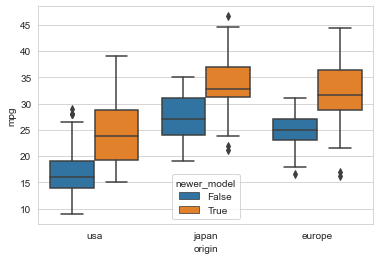

In [70]:
sns.boxplot(x='origin', y='mpg', hue='newer_model', data=cars);

## Styling Options

### order

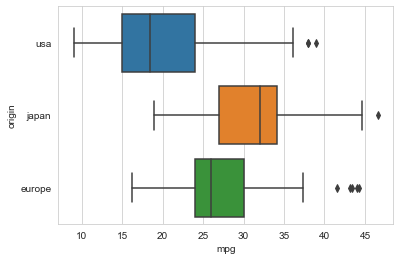

In [71]:
sns.boxplot(x='mpg', y='origin',   
            data=cars
           );

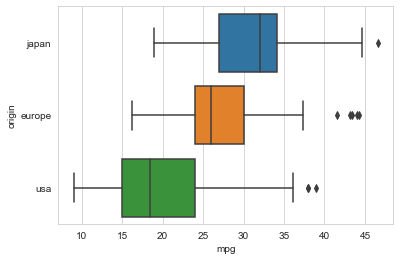

In [72]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            order=['japan', 'europe', 'usa']
           );

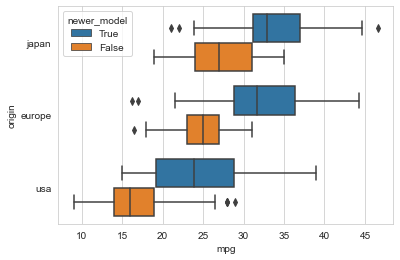

In [73]:
sns.boxplot(x='mpg', y='origin', hue='newer_model',
            data=cars,
            order=['japan', 'europe', 'usa'],
            hue_order=[True, False]
           );

### color

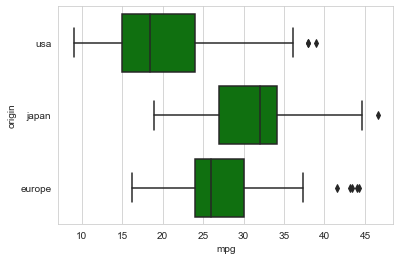

In [74]:
sns.boxplot(x='mpg', y='origin',  
            data=cars, 
            color='g'
           );

In [ ]:
sns.boxplot(x='mpg', y='origin', hue='newer_model',
            data=cars,
            color='g'
           );

### width

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            width=0.5
           ); 

### linewidth

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            linewidth=2.5
           );

### whis

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            whis=1
           );

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            whis=2
           );

### fliersize

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            fliersize=2
           );

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            fliersize=10
           );

### showcaps

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            showcaps=False
           );